# Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset

In [3]:
df = pd.read_csv('car driving risk analysis.csv')

In [4]:
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [6]:
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [7]:
df.shape

(15, 2)

# Check Null Value

In [8]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

# Separate X, Y

In [9]:
x = df[['speed']]

In [10]:
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [13]:
y = df['risk']

In [14]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

# Split Train, Test

In [15]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .40, random_state = 1)

In [27]:
#xtrain
xtest

,speed
3,110
7,230
6,50
2,300
10,290
4,240


In [28]:
#ytrain
ytest

3     60
7     85
6      7
2     98
10    82
4     72
Name: risk, dtype: int64

# Algorithm

In [29]:
from sklearn.linear_model import LinearRegression

# Object

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Score

In [32]:
lr.score(xtest, ytest)

0.7133824900141748

# Risk for New Speed

In [33]:
n = input('New Speed : ')
array = np.array(n)
array2 = array.astype(np.float)
value = [[array2]]
result = lr.predict(value)
risk_new = np.array(result)
risk_new = risk_new.item()
print('Predicted risk :', risk_new)

New Speed : 295
Predicted risk : 99.10194981201366


# Plot

Text(0.5, 1.0, 'Risk analysis with speed')

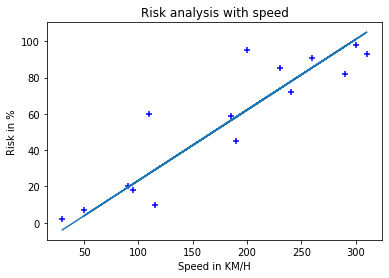

In [35]:
plt.scatter(df['speed'], df['risk'], marker='+', color = 'blue')
plt.plot(df.speed, lr.predict(df[['speed']]))
plt.xlabel('Speed in KM/H')
plt.ylabel('Risk in %')
plt.title('Risk analysis with speed')